

## **Puzzle 1**


In [ ]:
import pandas as pd

employee_df = pd.read_csv('EmployeeData.csv')
department_df = pd.read_csv('DepartmentData.csv')

employee_df['total_salary'] = employee_df['base_salary'] + employee_df['bonus']


merged_df = pd.merge(employee_df, department_df, on='department_id')


merged_df['effective_salary'] = merged_df['total_salary'] * (1 - merged_df['tax_rate'])

average_salary_df = merged_df.groupby('department_name')['effective_salary'].mean().reset_index()


sorted_departments = average_salary_df.sort_values(by='effective_salary', ascending=False)


top_departments = sorted_departments.head(10)


clue = ''.join(top_departments['department_name'].str[0].tolist())


print("Top Departments by Average Effective Salary:\n", top_departments)
print("\nScooby's Important Clue:", clue)


Top Departments by Average Effective Salary:
          department_name  effective_salary
0               Accounts      87621.851240
8                  Legal      84939.271700
9              Logistics      83338.993455
18             Technical      82845.040600
6                     HR      82318.159900
4            Engineering      77359.799700
1   Business Development      76212.396535
3              Education      70849.017375
16                 Sales      70457.413325
17    Talent Acquisition      64335.881610

Scooby's Important Clue: ALLTHEBEST


## **PUZZLE 2**

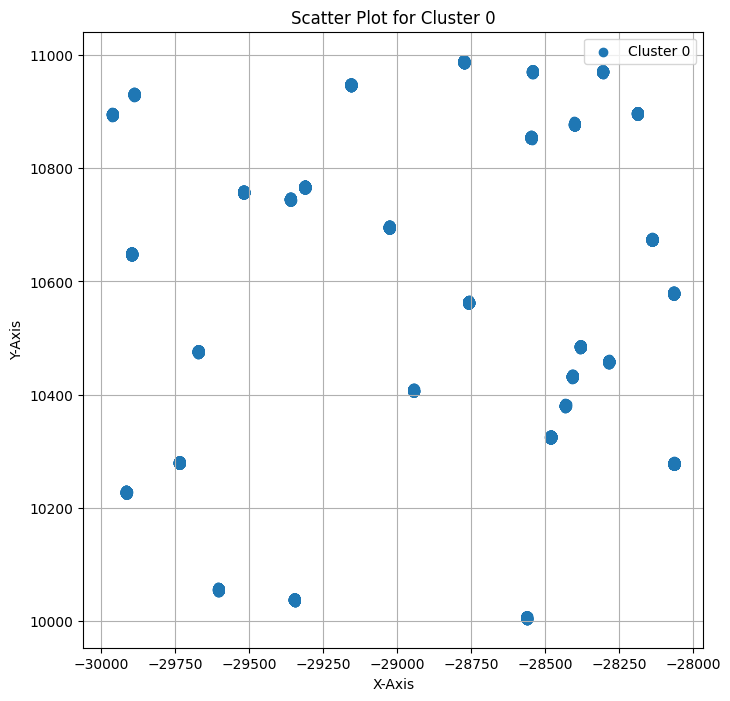

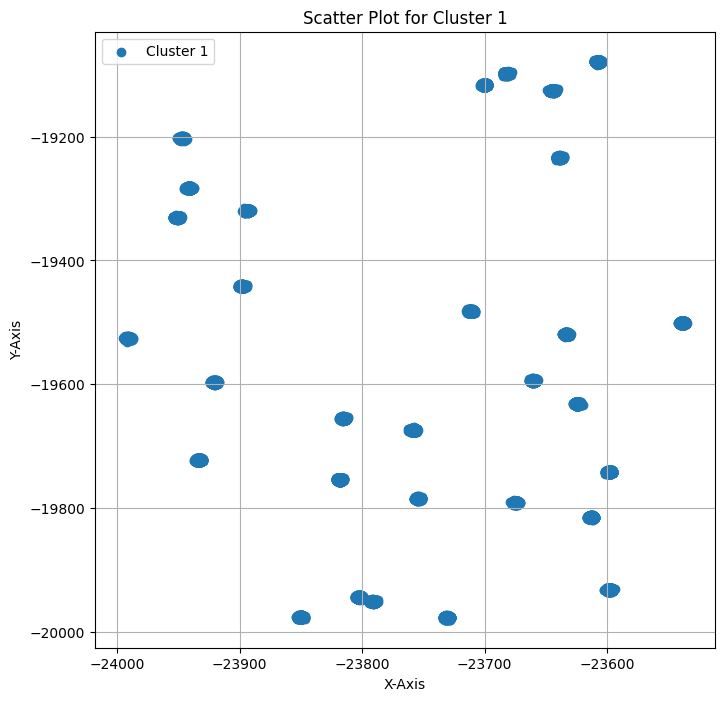

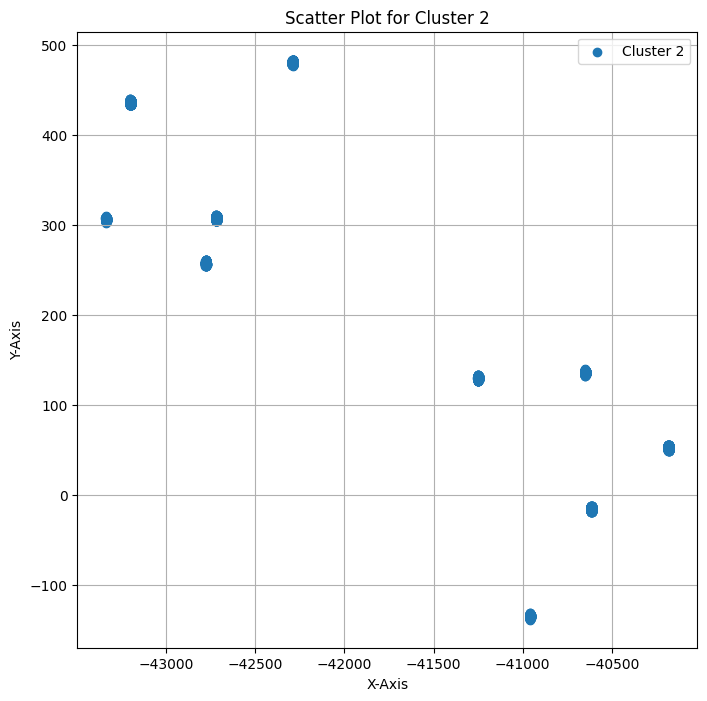

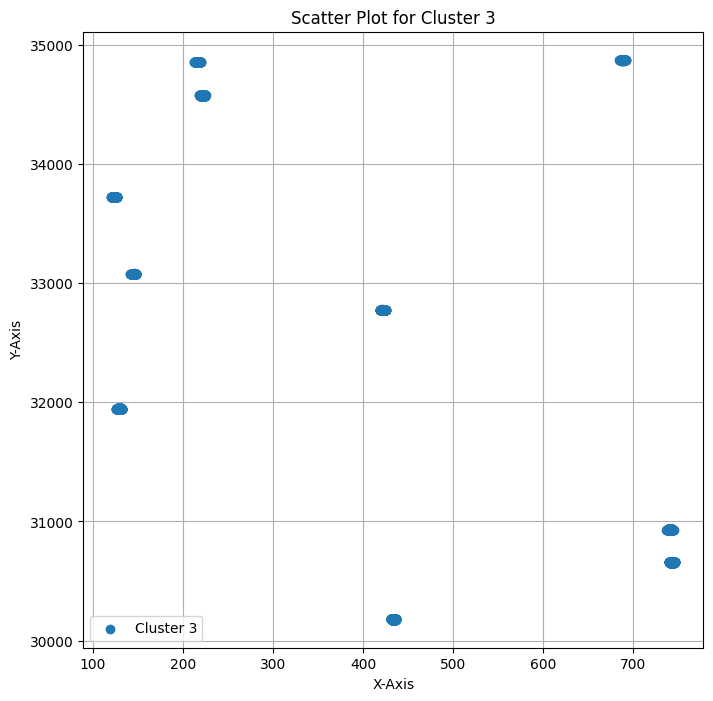

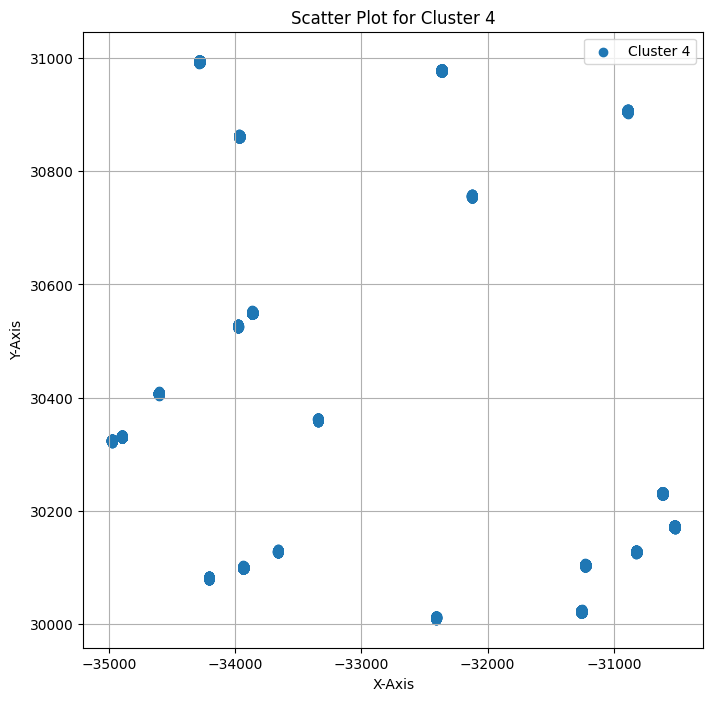

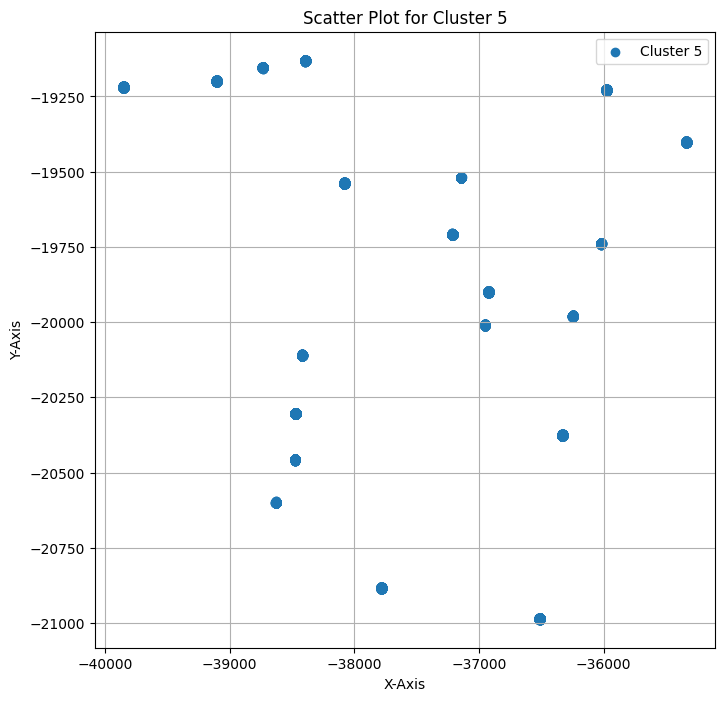

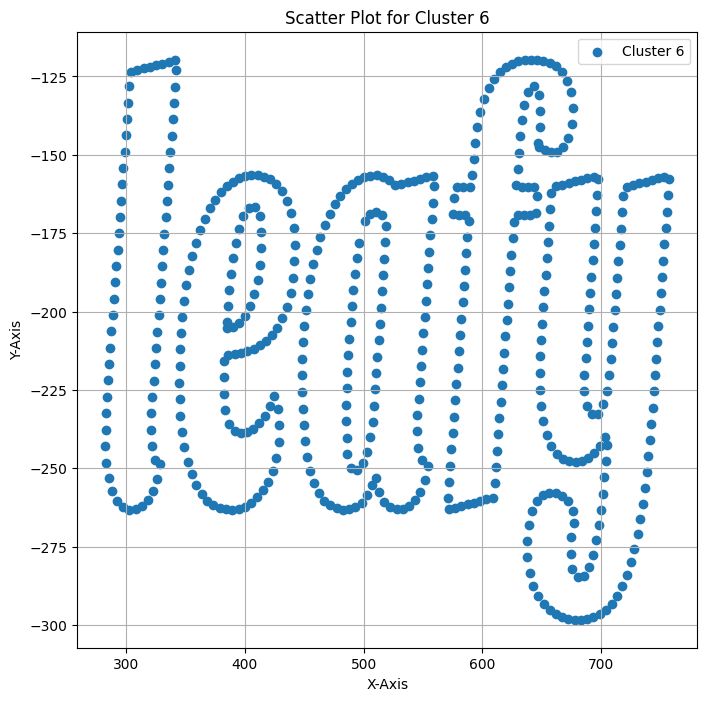

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('final_dataset.csv')
df = pd.DataFrame(data)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])

# Plot each cluster separately using Matplotlib
for cluster in range(7):
    plt.figure(figsize=(8, 8))
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
    plt.title(f'Scatter Plot for Cluster {cluster}')
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.grid(True)
    plt.legend()
    plt.show()


## **puzzle 3**




In [5]:
import pandas as pd
df = pd.read_csv('Hungry.csv')
df.head()


df_train = df.iloc[:15480,:]
train_y = df_train['target_binary']
df_train = df_train.drop(['target_binary'], axis=1)
df_pred = df.iloc[15481:, :]
df_pred = df_pred.drop(['target_binary'], axis=1)


df_train = pd.get_dummies(df_train)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_train, train_y)

train_columns = df_train.columns
df_pred = pd.get_dummies(df_pred)
df_pred = df_pred.reindex(columns=train_columns, fill_value=0)


pred_y = model.predict(df_pred)
print(pred_y)
df.loc[15481:, 'target_binary'] = pred_y
print(df)
df['target_binary'].value_counts()


import numpy as np
df = df.replace('?', np.nan)
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['1' '1' '1' ... '0' '1' '1']
       Unnamed: 0               id   MedInc  HouseAge  AveRooms  AveBedrms  \
0               0       train-5856   4.6898      45.0  5.039216   1.013725   
1               1       train-2899   1.9125      35.0  2.926829   0.853659   
2               2       train-6102   4.5221      36.0  5.267974   0.960784   
3               3       train-8403   2.3675      29.0  2.900128   1.040973   
4               4       train-1665   5.7001      16.0  6.778195   1.003759   
...           ...              ...      ...       ...       ...        ...   
40675       40675  image-[113:105]  10.4399      23.0  8.310671   1.023236   
40676       40676    image-[95:94]   7.4729      28.0  6.871036   1.025370   
40677       40677   image-[98:135]   5.1540      24.0  5.791453   1.082051   
40678       40678    image-[92:41]  10.0765       3.0  7.674359   1.100000   
40679       40679  image-[135:168]   6.1946      27.0  5.861486   0.967342   

       Population   AveOccup  Lat

In [ ]:
we have just trained the model without taking the rows below 15480 because it has no target label ,
trained it using logistic regression then used it
 to predict the rows below 14480 so that we get a prrediction of the missed prediction